# Before you start :
   - These exercises are related to the Subsetting and Descriptive Stats lessons.
   - Keep in mind that you need to use some of the functions you learned in the previous lessons.
   - All datasets are provided in the `your-code` folder of this lab.
   - Elaborate your codes and outputs as much as you can.
   - Try your best to answer the questions and complete the tasks and most importantly enjoy the process!!!

#### Import all the libraries that are necessary

In [1]:
# import libraries here
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import nltk

# Challenge 1

#### In this challenge we will use the `Temp_States.csv` file. 

#### First import it into a data frame called `temp`.

In [2]:
# your answer here
temp = pd.read_csv("Temp_States.csv", encoding = "ISO-8859-1")

#### Print `temp`

In [3]:
print(temp)

         City        State  Temperature
0         NYC     New York    19.444444
1      Albany     New York     9.444444
2     Buffalo     New York     3.333333
3    Hartford  Connecticut    17.222222
4  Bridgeport  Connecticut    14.444444
5      Treton   New Jersey    22.222222
6      Newark   New Jersey    20.000000


#### Explore the data types of the Temp dataframe. What type of data do we have? Comment your result.

In [4]:
# your answer here
temp.dtypes

City            object
State           object
Temperature    float64
dtype: object

#### Select the rows where state is New York

In [5]:
# your answer here
temp[temp.State == "New York"]

,City,State,Temperature
0,NYC,New York,19.444444
1,Albany,New York,9.444444
2,Buffalo,New York,3.333333


#### What is the average of the temperature of cities in New York?

In [6]:
# your answer here
temp[temp.State == "New York"].mean()

Temperature    10.740741
dtype: float64

#### We want to know cities and states with Temperature above 15 degress Celcius

In [7]:
# your answer here
temp[temp.Temperature > 15]

,City,State,Temperature
0,NYC,New York,19.444444
3,Hartford,Connecticut,17.222222
5,Treton,New Jersey,22.222222
6,Newark,New Jersey,20.000000


#### Now, return only the cities that have a temperature above 15 degress Celcius

In [8]:
# your answer here
temp.City[temp.Temperature > 15]

0         NYC
3    Hartford
5      Treton
6      Newark
Name: City, dtype: object

#### We want to know which cities have a temperature above 15 degrees Celcius and below 20 degrees Celcius

*Hint: First write the condition then select the rows.*

In [9]:
# your answer here
temp.City[(temp.Temperature > 15) & (temp.Temperature < 20)]

0         NYC
3    Hartford
Name: City, dtype: object

#### Find the mean and the standard deviation of the temperature of each state.

*Hint: Use functions from Data Manipulation lesson*

In [10]:
# your answer here
temp.groupby(by = "State").agg({"Temperature": ["mean", "std"]})

Temperature          
                   mean       std
State                            
Connecticut   15.833333  1.964186
New Jersey    21.111111  1.571348
New York      10.740741  8.133404

# Challenge 2

#### Load the `employee.csv` file into a DataFrame. Call the dataframe `employee`

In [11]:
# your answer here
employee = pd.read_csv("Employee.csv", encoding = "ISO-8859-1")

#### Explore the data types of the Temp dataframe. Comment your results

In [12]:
# your answer here
employee.dtypes

Name          object
Department    object
Education     object
Gender        object
Title         object
Years          int64
Salary         int64
dtype: object

#### Show visually the frequency distribution (histogram) of the employee dataset. In few words describe these histograms?

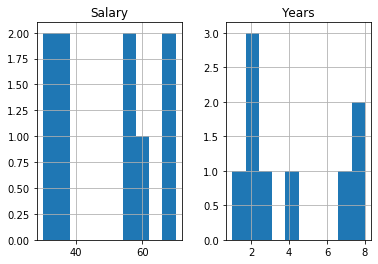

In [13]:
# your answer here
employee.hist();

#### What's the average salary in this company?

In [14]:
# your answer here
employee.Salary.mean()

48.888888888888886

#### What's the highest salary?

In [15]:
# your answer here
employee.Salary.max()

70

#### What's the lowest salary?

In [16]:
# your answer here
employee.Salary.min()

30

#### Who are the employees with the lowest salary?

In [17]:
# your answer here
employee.sort_values("Salary").Name

1     Maria
2     David
0      Jose
3     Sonia
4    Samuel
5       Eva
7     Pedro
6    Carlos
8       Ana
Name: Name, dtype: object

#### Could you give all the information about an employee called David?

In [18]:
# your answer here
employee[employee.Name == "David"]

,Name,Department,Education,Gender,Title,Years,Salary
2,David,HR,Master,M,analyst,2,30


#### Could you give only David's salary?

In [19]:
# your answer here
employee.Salary[employee.Name == "David"]

2    30
Name: Salary, dtype: int64

#### Print all the rows where job title is associate

In [20]:
# your answer here
employee[employee.Title == "associate"]

,Name,Department,Education,Gender,Title,Years,Salary
4,Samuel,Sales,Master,M,associate,3,55
5,Eva,Sales,Bachelor,F,associate,2,55
7,Pedro,IT,Phd,M,associate,7,60


#### Print the first 3 rows of your dataframe

##### Tip : There are 2 ways to do it. Do it both ways

In [21]:
# your answer here- 1 method
employee[:3]

,Name,Department,Education,Gender,Title,Years,Salary
0,Jose,IT,Bachelor,M,analyst,1,35
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30


In [22]:
# your answer here- 2nd method
employee.loc[:2]

,Name,Department,Education,Gender,Title,Years,Salary
0,Jose,IT,Bachelor,M,analyst,1,35
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30


#### Find the employees who's title is associate and the salary above 55?

In [23]:
# your answer here
employee[(employee.Title == "associate") & (employee.Salary > 55)].Name

7    Pedro
Name: Name, dtype: object

#### Group the employees based on their number of years of employment. What are the average salaries in each group?

In [24]:
# your answer here
employee.groupby(by = "Years").agg({"Salary": ["mean"]})

,Salary
,mean
Years,
1,35.000000
2,38.333333
3,55.000000
4,35.000000
7,60.000000
8,70.000000


####  What is the average Salary per title?

In [25]:
# your answer here
employee.groupby(by = "Title").agg({"Salary": ["mean"]})

,Salary
,mean
Title,
VP,70.000000
analyst,32.500000
associate,56.666667


#### Show a visual summary of the data using boxplot. What Are the First and Third Quartiles? Comment your results.
##### * Hint : Quantiles vs Quartiles*
##### - `In Probability and Statistics, quantiles are cut points dividing the range of a probability distribution into continuous intervals with equal probabilities. When division is into four parts the values of the variate corresponding to 25%, 50% and 75% of the total distribution are called quartiles.`

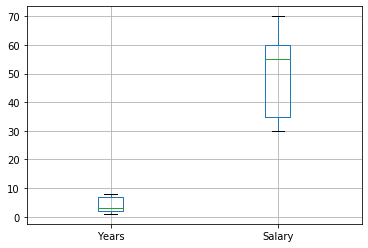

In [26]:
# draw boxplot here
employee.boxplot();

In [27]:
# print first quartile here
employee.quantile([0.25])

,Years,Salary
0.25,2.0,35.0


In [28]:
# print third quartile here
employee.quantile([0.75])

,Years,Salary
0.75,7.0,60.0


#### Is the mean salary per gender different?

In [29]:
# your answer here
employee.groupby(by = "Gender").agg({"Salary": ["mean"]})

,Salary
,mean
Gender,
F,47.5
M,50.0


#### Find the minimum, mean and the maximum of all numeric columns for each Department.

##### Hint: Use functions from Data Manipulation lesson

In [30]:
# your answer here
employee.groupby(by = "Department").agg({"Salary":["mean", "min", "max"]})

Salary        
             mean min max
Department               
HR          45.00  30  70
IT          48.75  30  70
Sales       55.00  55  55

### Bonus Question

#### For each department, compute the difference between the maximal salary and the minimal salary.

##### * Hint: try using `agg` or `apply` and `lambda`*

In [31]:
# your answer here
def SalaryDifference(x):
    return max(x) - min(x)

employee.groupby(by = "Department").agg({"Salary": ["max", "min", SalaryDifference]})

Salary                     
              max min SalaryDifference
Department                            
HR             70  30               40
IT             70  30               40
Sales          55  55                0

# Challenge 3

#### Open the Orders.csv dataset. Name your dataset orders

In [32]:
# your answer here
orders = pd.read_csv("Orders.csv", encoding = "ISO-8859-1")

#### Explore your dataset by looking at the data types and the summary statistics. Comment your results

In [33]:
# your answer here
orders.dtypes

Unnamed: 0        int64
InvoiceNo         int64
StockCode        object
year              int64
month             int64
day               int64
hour              int64
Description      object
Quantity          int64
InvoiceDate      object
UnitPrice       float64
CustomerID        int64
Country          object
amount_spent    float64
dtype: object

In [34]:
# your answer here
orders.describe()

,Unnamed: 0,InvoiceNo,year,month,day,hour,Quantity,UnitPrice,CustomerID,amount_spent
count,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000
mean,278465.221859,560617.126645,2010.934259,7.612537,3.614555,12.728247,13.021823,3.116174,15294.315171,22.394749
std,152771.368303,13106.167695,0.247829,3.416527,1.928274,2.273535,180.420210,22.096788,1713.169877,309.055588
min,0.000000,536365.000000,2010.000000,1.000000,1.000000,6.000000,1.000000,0.000000,12346.000000,0.000000
25%,148333.750000,549234.000000,2011.000000,5.000000,2.000000,11.000000,2.000000,1.250000,13969.000000,4.680000
50%,284907.500000,561893.000000,2011.000000,8.000000,3.000000,13.000000,6.000000,1.950000,15159.000000,11.800000
75%,410079.250000,572090.000000,2011.000000,11.000000,5.000000,14.000000,12.000000,3.750000,16795.000000,19.800000
max,541908.000000,581587.000000,2011.000000,12.000000,7.000000,20.000000,80995.000000,8142.750000,18287.000000,168469.600000


####  What is the average Purchase Price?

In [35]:
# your answer here
orders.UnitPrice.mean()

3.1161744805540756

#### What were the highest and lowest purchase prices? 

In [36]:
# your answer here
orders.UnitPrice.max()

8142.75

In [37]:
# your answer here
orders.UnitPrice.min()

0.0

#### Select all the customers we have in Spain

In [38]:
# your answer here
orders.CustomerID[orders.Country == "Spain"]

4250      12557
4251      12557
4252      12557
4253      12557
4254      12557
13974     17097
13975     17097
13976     17097
13977     17097
13978     17097
13979     17097
13980     17097
13981     17097
13982     17097
13983     17097
13984     17097
13985     17097
13986     17097
13987     17097
13988     17097
13989     17097
13990     17097
13991     17097
13992     17097
13993     17097
13994     17097
13995     17097
13996     17097
13997     17097
13998     17097
          ...  
394708    17097
394709    17097
394710    17097
394711    17097
394712    17097
394713    17097
394714    17097
394715    17097
394716    17097
394717    17097
394718    17097
394719    17097
394720    17097
394721    17097
394722    17097
394723    17097
394724    17097
394725    17097
394726    17097
394727    17097
394728    17097
394729    17097
394730    17097
394731    17097
394732    17097
394733    17097
394734    17097
394735    17097
394736    17097
394737    17097
Name: CustomerID, Length

#### How many customers do we have in Spain?
##### Hint : Use value_counts()

In [39]:
# your answer here
orders.CustomerID[orders.Country == "Spain"].value_counts().sum()

2485

#### Select all the customers who have bought more than 50 items ?

In [40]:
# your answer here
items = orders.groupby(by = "CustomerID").agg({"Quantity":["sum"]})
items.Quantity[items.Quantity > 50]

,sum
CustomerID,
12346,74215.0
12347,2458.0
12348,2341.0
12349,631.0
12350,197.0
12352,536.0
12353,NaN
12354,530.0
12355,240.0


#### Select orders from Spain that are above 50 items

In [41]:
# your answer here
items_Spain = orders[orders.Country == "Spain"].groupby(by = "InvoiceNo").agg({"Quantity":["sum"]})
items_Spain.Quantity[items_Spain.Quantity > 50]

,sum
InvoiceNo,
536944,400.0
538095,67.0
538525,300.0
539351,100.0
540469,630.0
540550,643.0
540785,1008.0
540801,475.0
541491,294.0


#### Select all free orders

In [42]:
# your answer here
orders.InvoiceNo[orders.amount_spent == 0]

6914      537197
22539     539263
25379     539722
29080     540372
29082     540372
34494     541109
53788     543599
85671     547417
92875     548318
97430     548871
107192    550188
128641    553000
137127    554037
194648    561284
197173    561669
199711    561916
208950    562973
223931    564651
223932    564651
223933    564651
223934    564651
256263    568158
259399    568384
273926    569716
286507    571035
307092    572893
319882    574138
320049    574175
320407    574252
322279    574469
328385    574879
329006    574920
329007    574920
334242    575579
334243    575579
352746    577129
353097    577168
354170    577314
358629    577696
370473    578841
Name: InvoiceNo, dtype: int64

#### Select all orders that are 'lunch bag'
#### Hint: Use string functions

In [43]:
# your answer here
orders.InvoiceNo[orders.Description.str.startswith("lunch bag")]

93        536378
172       536385
354       536401
359       536401
360       536401
361       536401
362       536401
402       536404
403       536404
404       536404
532       536412
533       536412
535       536412
536       536412
537       536412
605       536412
1414      536542
1415      536542
1416      536542
1748      536576
1758      536577
1771      536579
1926      536597
1935      536597
2334      536634
2529      536643
2676      536698
3059      536754
3060      536754
3064      536754
           ...  
396300    581412
396301    581412
396302    581412
396303    581412
396307    581412
396308    581412
396408    581413
396414    581413
396416    581413
396419    581413
396530    581418
396572    581420
396573    581420
396574    581420
396575    581420
396576    581420
396721    581426
396970    581450
396971    581450
396972    581450
397006    581451
397038    581453
397047    581453
397255    581473
397298    581474
397465    581486
397713    581538
397714    5815

#### Select all orders that are made in 2011 and are 'lunch bag'  

In [44]:
# your answer here
orders.InvoiceNo[(orders.year == 2011) & (orders.Description.str.startswith("lunch bag"))]

26340     540015
26341     540015
26512     540023
26513     540023
26860     540098
26861     540098
26862     540098
26863     540098
26864     540098
26902     540099
26903     540099
27118     540157
27242     540168
27360     540176
27361     540176
27727     540247
27758     540247
27760     540247
28100     540268
28136     540268
28137     540268
28138     540268
28183     540275
28188     540275
28189     540275
28201     540275
28218     540276
28219     540276
28220     540276
28221     540276
           ...  
396300    581412
396301    581412
396302    581412
396303    581412
396307    581412
396308    581412
396408    581413
396414    581413
396416    581413
396419    581413
396530    581418
396572    581420
396573    581420
396574    581420
396575    581420
396576    581420
396721    581426
396970    581450
396971    581450
396972    581450
397006    581451
397038    581453
397047    581453
397255    581473
397298    581474
397465    581486
397713    581538
397714    5815

#### Show the frequency distribution of the amount spent in Spain.

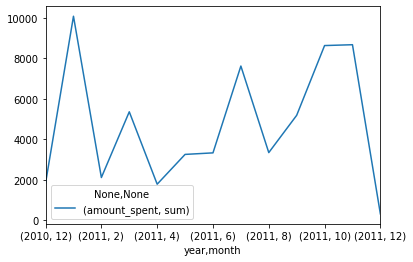

In [45]:
# your answer here
graph = orders[orders.Country == "Spain"].groupby(["year", "month"]).agg({"amount_spent": ["sum"]})
graph.plot();

#### Select all orders made in the month of August

In [46]:
# your answer here
orders.InvoiceNo[orders.month == 8]

199475    561904
199476    561904
199477    561905
199478    561905
199479    561905
199480    561905
199481    561905
199482    561905
199483    561905
199484    561905
199485    561905
199486    561905
199487    561906
199488    561906
199489    561906
199490    561906
199491    561906
199492    561906
199493    561906
199494    561906
199495    561906
199496    561906
199497    561906
199498    561906
199499    561906
199500    561906
199501    561906
199502    561906
199503    561906
199504    561906
           ...  
226458    565067
226459    565067
226460    565067
226461    565067
226462    565067
226463    565067
226464    565067
226465    565067
226466    565067
226467    565067
226468    565067
226469    565067
226470    565067
226471    565067
226472    565067
226473    565067
226474    565067
226475    565067
226476    565067
226477    565067
226478    565067
226479    565067
226480    565067
226481    565067
226482    565067
226483    565067
226484    565067
226485    5650

# Select how many orders are made by countries in the month of August
##### Hint: Use value_counts()

In [47]:
# your answer here
orders.InvoiceNo[orders.month == 8].value_counts().sum()

27013

#### What's the  average amount of money spent by country

In [48]:
# your answer here
orders.groupby(by = "Country").agg({"amount_spent": ["mean"]})

,amount_spent
,mean
Country,
Australia,116.895620
Austria,25.624824
Bahrain,32.258824
Belgium,20.283772
Brazil,35.737500
Canada,24.280662
Channel Islands,27.340160
Cyprus,22.134169


#### What's the most expensive item?

In [49]:
# your answer here
orders.Description[orders.UnitPrice == orders.UnitPrice.max()]

118352    postage
Name: Description, dtype: object

#### What was the average amount spent per year ?

In [50]:
# your answer here
orders.groupby(by = "year").agg({"amount_spent": ["mean"]})

,amount_spent
,mean
year,
2010,21.892733
2011,22.430074
